In [8]:
import numpy as np
import pandas as pd
from subprocess import check_output
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline

In [9]:
df = pd.read_csv('MBTI 500.csv')

In [10]:
df.head()

,posts,type
0,know intj tool use interaction people excuse a...,INTJ
1,rap music ehh opp yeah know valid well know fa...,INTJ
2,preferably p hd low except wew lad video p min...,INTJ
3,drink like wish could drink red wine give head...,INTJ
4,space program ah bad deal meing freelance max ...,INTJ


In [11]:
mapping = {
    'I': 'Introversion',
    'E': 'Extroversion',
    'N': 'Intuition',
    'S': 'Sensing',
    'T': 'Thinking',
    'F': 'Feeling',
    'J': 'Judging',
    'P': 'Perceiving',
}

In [12]:
X = pd.DataFrame()
for c in 'INTJESFP':
    X[c] = df['type'].apply(lambda x: 1 if c in x else 0)

In [13]:
X

,I,N,T,J,E,S,F,P
0,1,1,1,1,0,0,0,0
1,1,1,1,1,0,0,0,0
2,1,1,1,1,0,0,0,0
3,1,1,1,1,0,0,0,0
4,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...
106062,1,1,0,0,0,0,1,1
106063,1,1,0,0,0,0,1,1
106064,1,1,0,0,0,0,1,1
106065,1,1,0,0,0,0,1,1


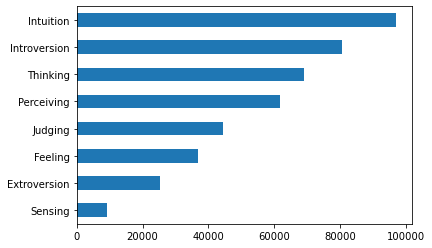

In [14]:
_ = X.sum().sort_values().rename(lambda x: mapping[x]).plot.barh()

In [15]:
cv = CountVectorizer(max_features=2000, strip_accents='ascii')
result = cv.fit_transform(df['posts'])

In [16]:
X = pd.concat([X, pd.DataFrame(result.toarray(), columns=['w_' + k for k in cv.vocabulary_.keys()])],
              axis=1)

In [17]:
wcols = [col for col in X.columns if col.startswith('w_') and len(col) > 5]
XX = X[wcols].T[X[wcols].mean() >= 0.5].T
def unique_words(a, b):
    (XX[X[a] == 1].mean() / XX[X[b] == 1].mean()).sort_values().rename(lambda x: x[2:]).tail(10).plot.barh()
    plt.title(mapping[a] + ' vs ' + mapping[b])

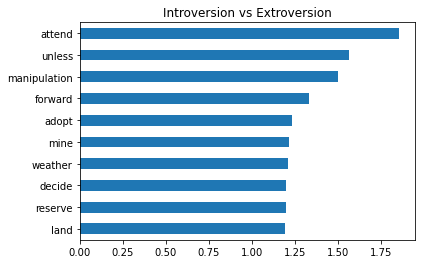

In [22]:
unique_words('I', 'E')

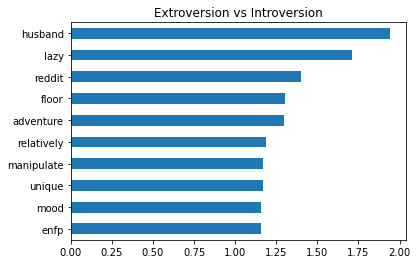

In [23]:
unique_words('E', 'I')

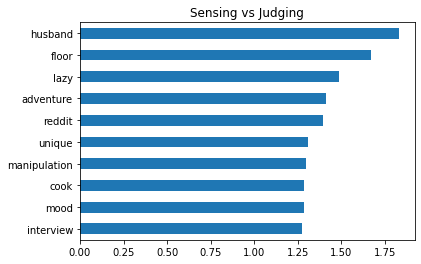

In [24]:
unique_words('S', 'J')

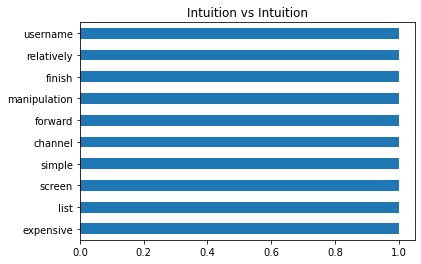

In [32]:
unique_words('N', 'N')

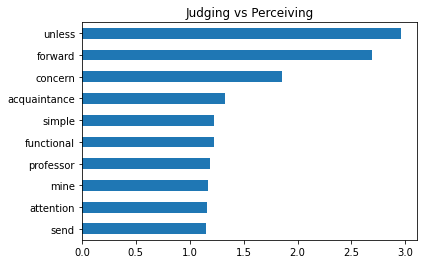

In [28]:
unique_words('J', 'P')

In [7]:
X.head(10)

NameError: name 'X' is not defined

In [1]:
#import imageio
#from wordcloud import WordCloud, STOPWORDS

#fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,10*len(df['type'].unique())))

#k = 0
#for i in df['type'].unique():
#    df_4 = df[df['type'] == i]
#    wordcloud = WordCloud().generate(df_4['posts'].to_string())
#    ax[k].imshow(wordcloud)
#    ax[k].set_title(i)
#    ax[k].axis("off")
#    k+=1